<a href="https://colab.research.google.com/github/Pratikshakharode/Bank-Marketing-Effectiveness-Prediction/blob/main/Self_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
Data= pd.read_csv('/content/drive/MyDrive/Project-3/bank-full.csv', sep=";")
Dataset=Data.copy()

In [6]:
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
Dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
Dataset.shape

(45211, 17)

In [9]:
# Attribute information
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Dataset contains 45211 rows and 17 columns.

In [10]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
# Checking Missing Values
Dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we can see there are no missing values present in the dataset. We don’t need to impute any missing values.

In [12]:
# checking unique values
Dataset.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [13]:
# checking the duplicate values in our data
Dataset.duplicated().value_counts()

False    45211
dtype: int64

#**Descriptive Analysis**


-- We have two types of variables in our data set. These are Continuous Variables and Categorical Variables

In [14]:
# some important statistical description of feature in our dataset
Dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
Dataset.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [16]:
# List of numeric columns
numerical_columns = list(Dataset.select_dtypes(exclude=['object']))
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [17]:
# List of Categorical columns
categorical_columns = list(Dataset.select_dtypes(include=['object']))
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

#**Exploratory Data Analysis**

#**Target Variable**



Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. y distribution looks like.

**Target Variable :** y - has the client subscribed a term deposit? (binary: 'yes','no')

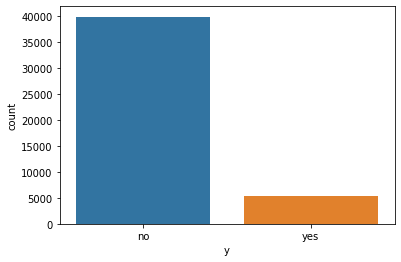

In [18]:
#Visualising The Target Variable
g=sns.countplot(Dataset['y'])

As we can see the data is highly imbalance

Majority of the data points belong to no class. Ratio of No class to yes class is 8:1

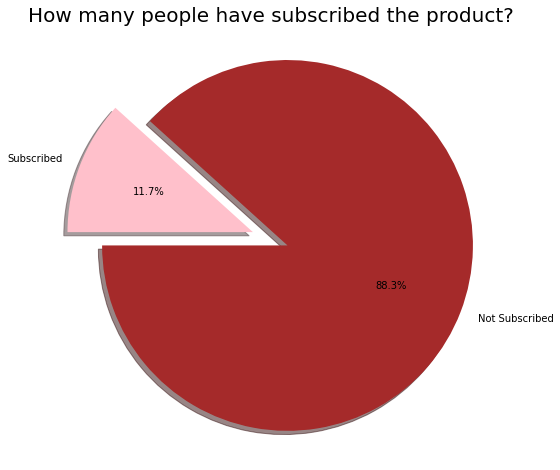

In [19]:
#Visualising How Many Costumer Have Subscribed

labels='Not Subscribed','Subscribed'
sizes=Dataset.y.value_counts()
colors=['brown','pink']
explode=(0.2,0.0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.title('How many people have subscribed the product?',fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Only 11.7% people have subscribed to our product

#**Univariate Analysis**

**Let’s start doing EDA on rest of the columns of the datapoints.**

## **Bar Graph Representation Of Each Variables**

## **Categorical Feature Exploration**

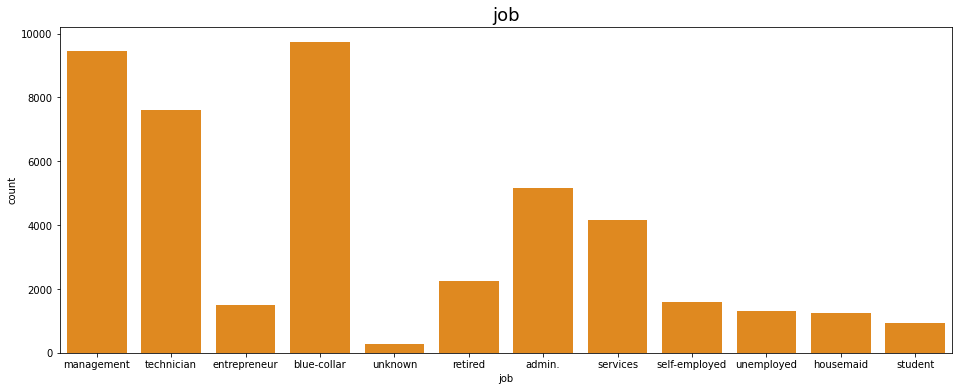

In [21]:
#job
plt.figure(figsize=(16,6))
sns.countplot(Dataset['job'],color='DarkOrange')
plt.title('job',fontsize=18)
plt.show()

We have type of job :- (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’).

There exists around 12 different type of job profiles.

Top 3 job profiles are blue-collar, managment and technician which contains 60% of the total records.

From the above distribution we can see that most of the customers have jobs as "management", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.



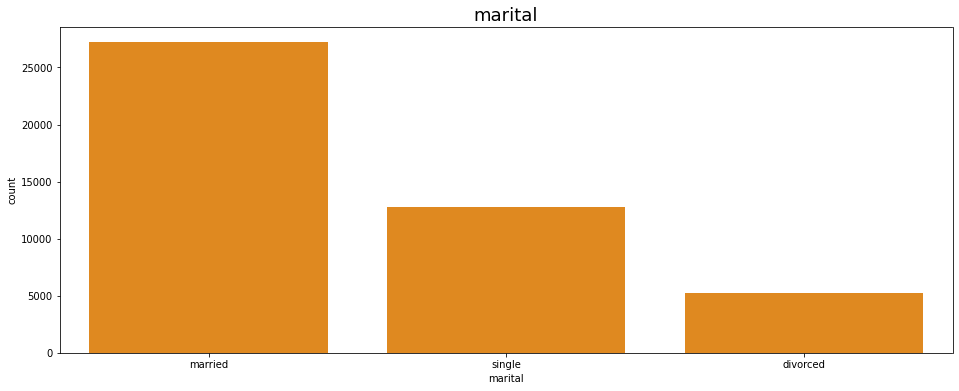

In [22]:
#marital
plt.figure(figsize=(16,6))
sns.countplot(Dataset['marital'],color='DarkOrange')
plt.title('marital',fontsize=18)
plt.show()

Marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed).

Around 60% of our client base is married, 28% is single and 12% are divorced.

Client who married are high in records in given dataset and divorced are less.

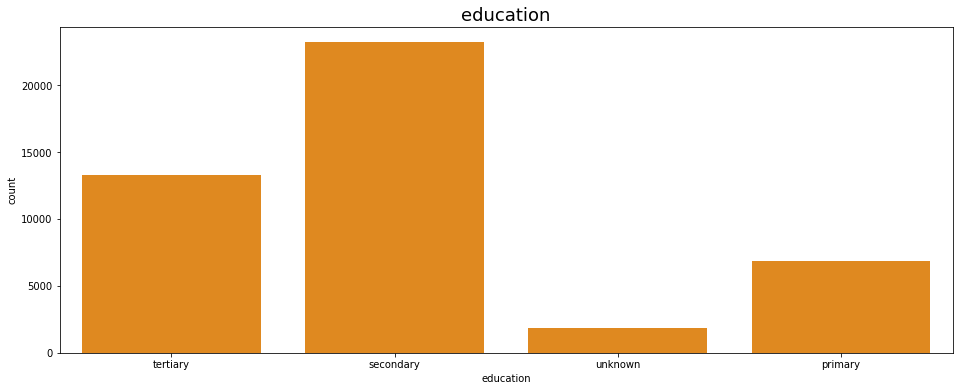

In [23]:
#education
plt.figure(figsize=(16,6))
sns.countplot(Dataset['education'],color='DarkOrange')
plt.title('education',fontsize=18)
plt.show()

Client whose education background is secondary are in high numbers in given dataset.

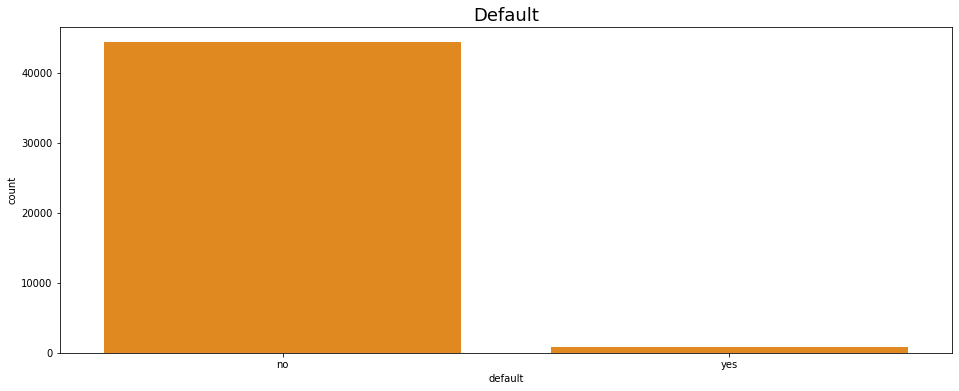

In [24]:
#default
plt.figure(figsize=(16,6))
sns.countplot(Dataset['default'],color='DarkOrange')
plt.title('Default',fontsize=18)
plt.show()

Column default says that client has credit in default or not. It has categorical value: 'no', 'yes', 'unknown'.

Client whose education background is secondary are in high numbers in given dataset.

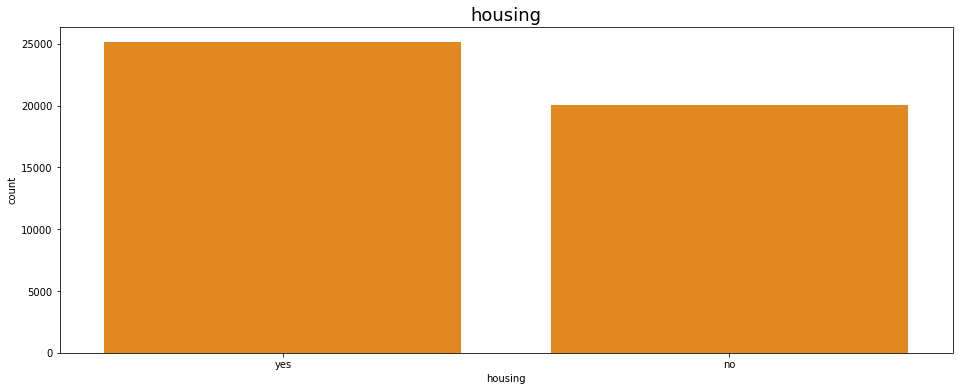

In [25]:
#housing
plt.figure(figsize = (16,6))
sns.countplot(Dataset['housing'], color = 'DarkOrange')
plt.title('housing', fontsize=18)
plt.show()

People with housing loan are the most ones who have been contacted by the bank followed by people with no housing loan.

Most of the client has taken the housing loan.

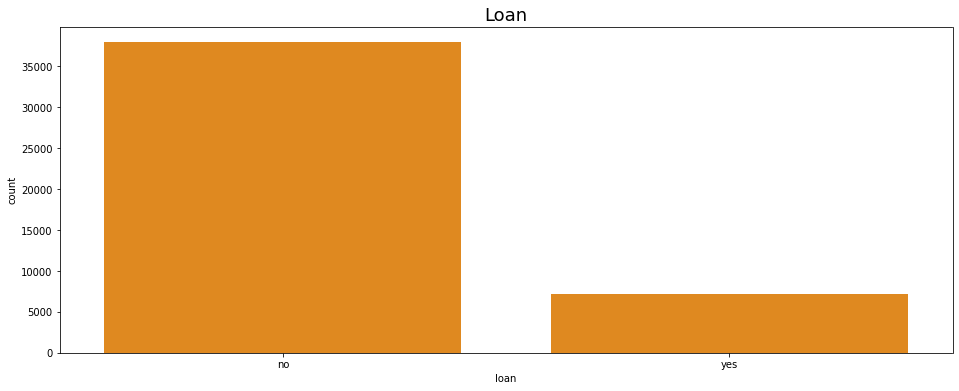

In [26]:
#loan
plt.figure(figsize = (16,6))
sns.countplot(Dataset['loan'], color = 'DarkOrange')
plt.title('Loan', fontsize=18)
plt.show()

As per data, some client has taken the personal loan.

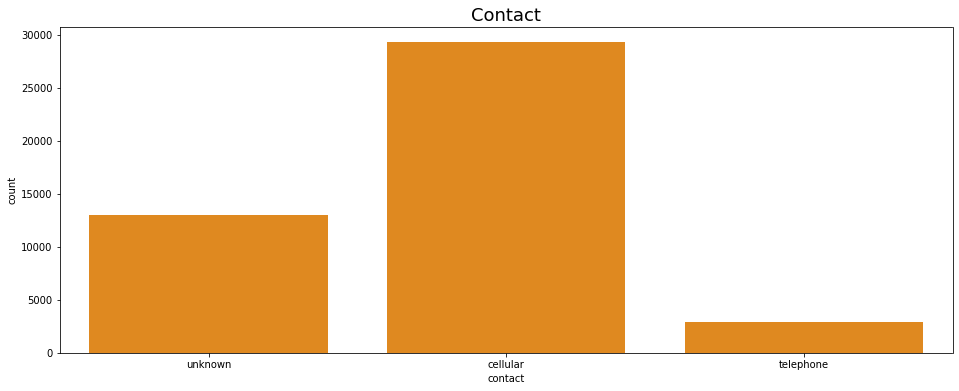

In [27]:
#contact
plt.figure(figsize = (16,6))
sns.countplot(Dataset['contact'], color = 'DarkOrange')
plt.title('Contact', fontsize=18)
plt.show()

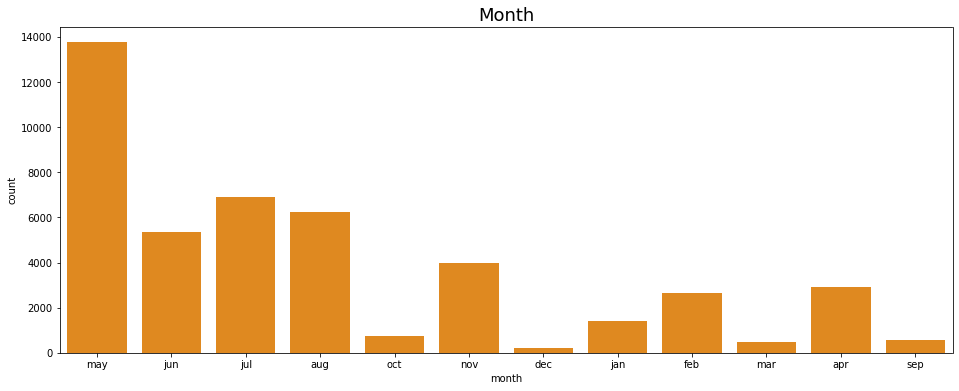

In [28]:
#month
plt.figure(figsize = (16,6))
sns.countplot(Dataset['month'], color = 'DarkOrange')
plt.title('Month', fontsize=18)
plt.show()

month :- last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

Data in month of may is high and less in Dec

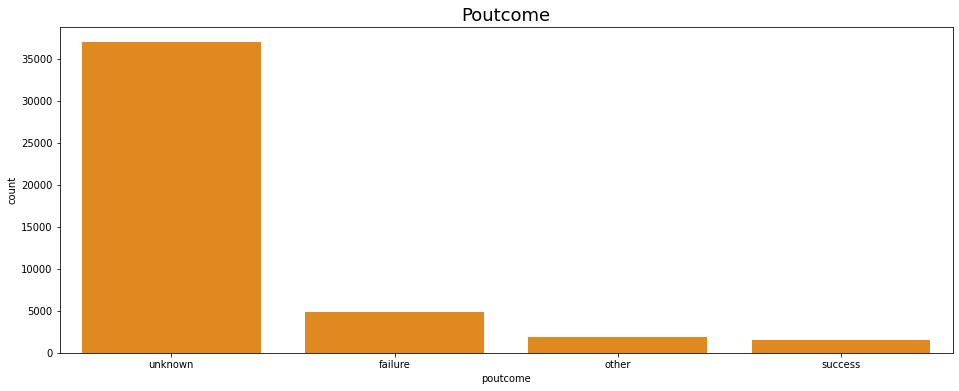

In [29]:
#poutcome
plt.figure(figsize = (16,6))
sns.countplot(Dataset['poutcome'], color = 'DarkOrange')
plt.title('Poutcome', fontsize=18)
plt.show()

This feature indicates the outcome of the previous marketing campaign

Majority of the outcome of the previous campaign is Non-Existent. Very few people counts who successfully subscribed from previous marketing strategy.

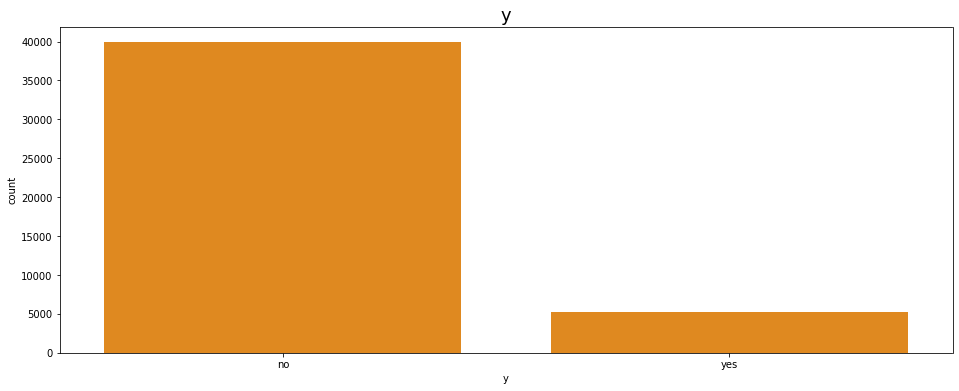

In [30]:
#y
plt.figure(figsize = (16,6))
sns.countplot(Dataset['y'], color = 'DarkOrange')
plt.title('y', fontsize=18)
plt.show()

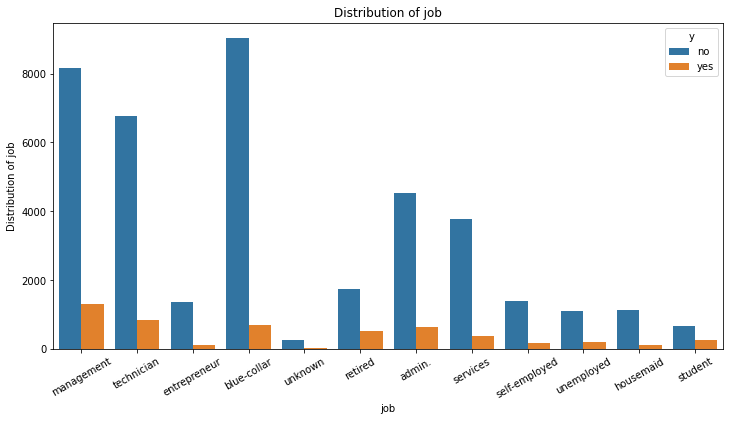

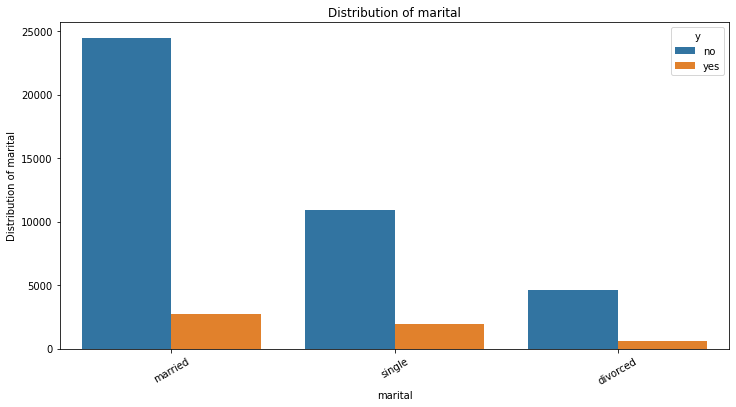

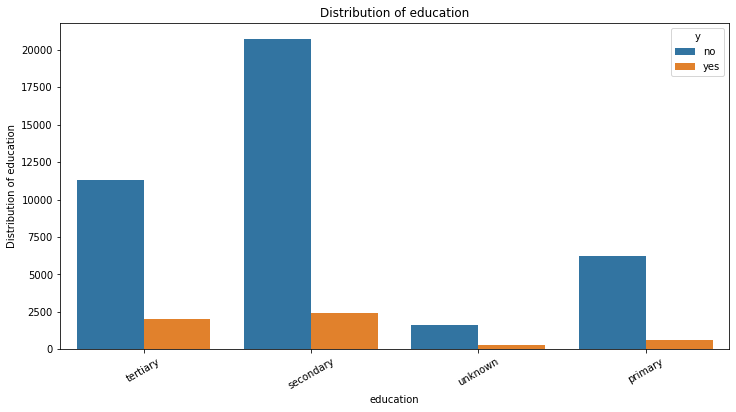

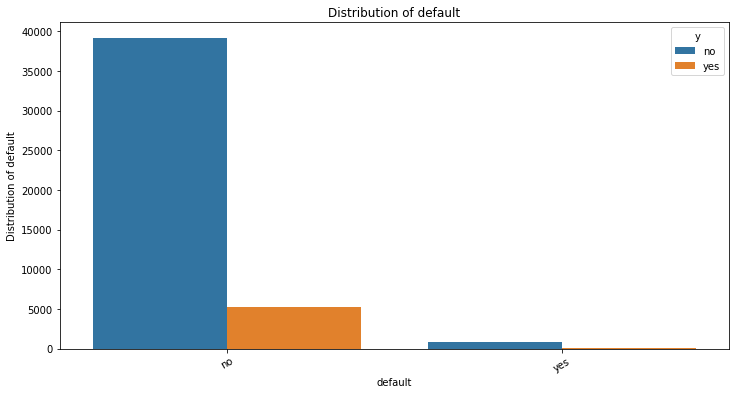

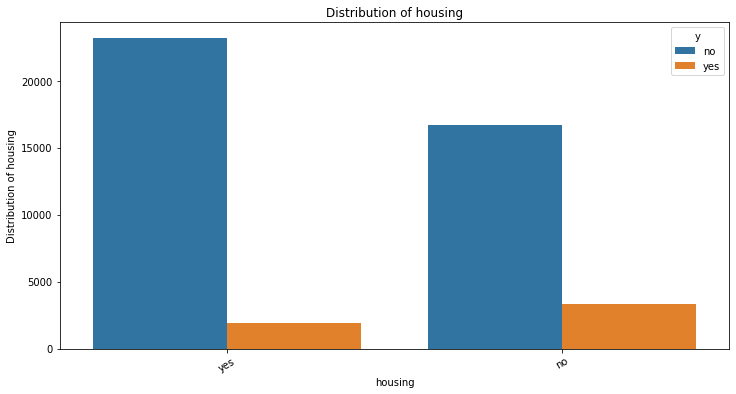

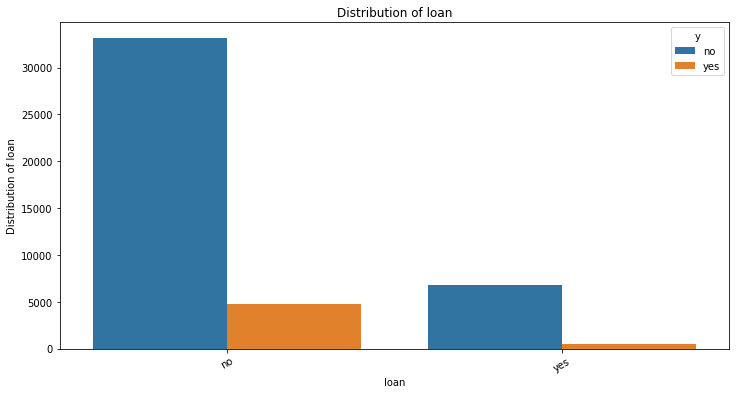

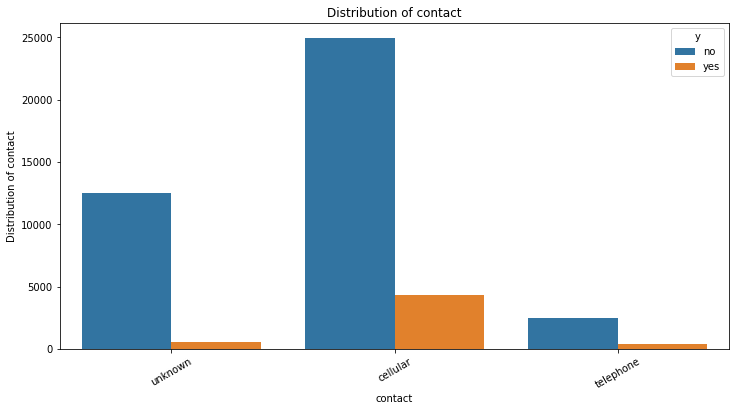

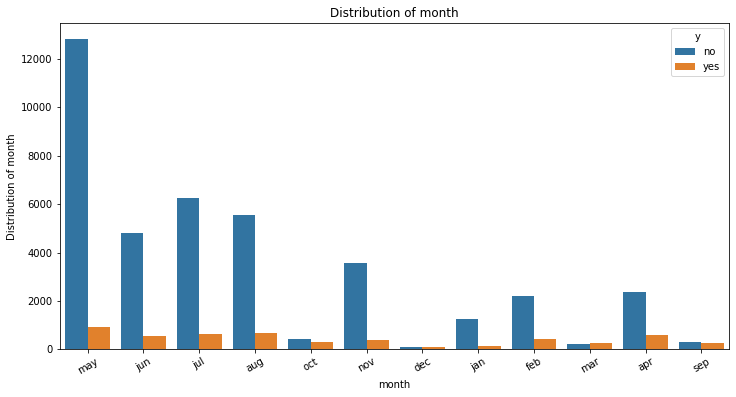

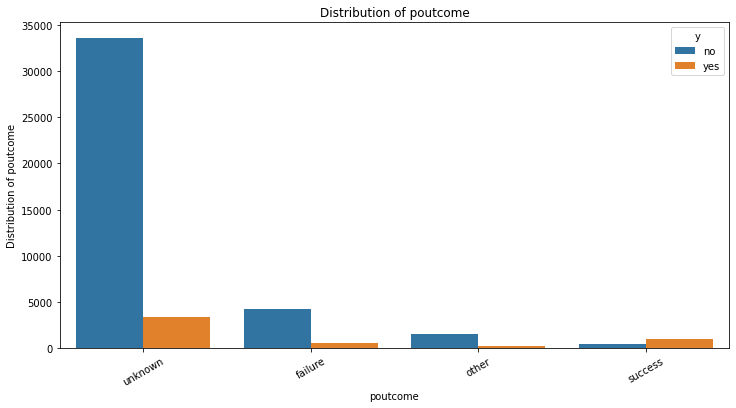

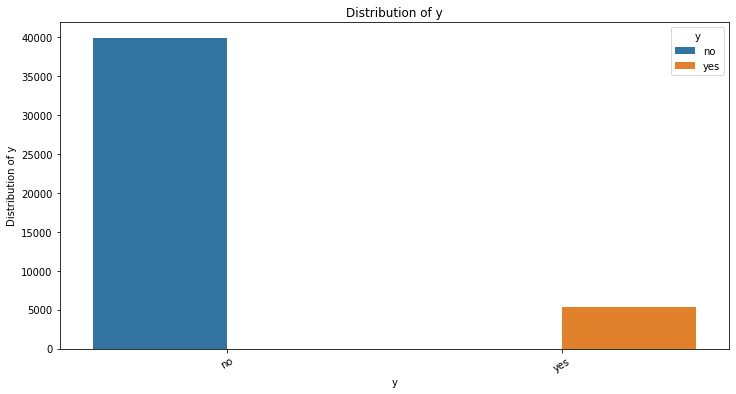

In [31]:
#Countplot Of Categorical features

for col in categorical_columns:
  plt.figure(figsize=(12,6))
  sns.countplot(x=Dataset[col],hue=Dataset['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.ylabel('Distribution of {}'.format(col))
  plt.title('Distribution of {}'.format(col))
  plt.xticks(rotation=30)
  plt.show()

From the above plots we can analyze that:


* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.  
*   Success rate is highest for student.
*   Most of the clients contacted have previous outcome as 'unknown'.
*   Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
*   March has highest success rate.
*   Most of the people are contacted through cellular.
*   As seen for default variable, less client are contacted who have loan.
*  Very few clients are contacted who are defaulter.
*   Most of the people who are contacted have tertiray or secondary education.

As we can see that married people are more tend to invest in product and have subscribed more in comparison to others




#**Numerical Columns Exploration**

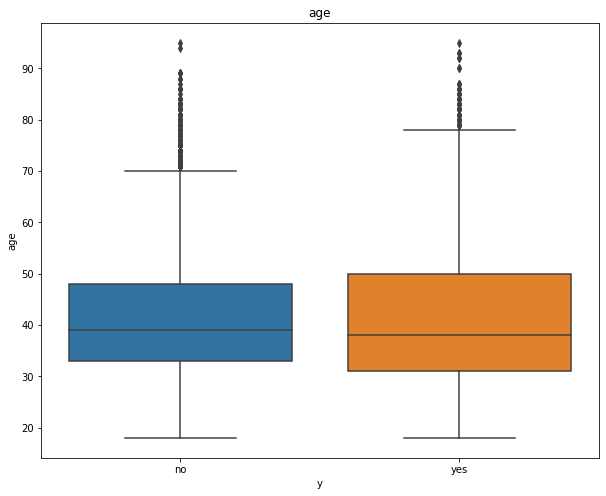

In [32]:
# Relation between Continous numerical Features and Labels
# boxplot to show target distribution with respect numerical features

plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['age'],x=Dataset['y'])
plt.title('age')
plt.xlabel('y')
plt.show()

In the above plot it is clear that a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles) and for each of the target variable the age feauture is not linearly seperable.Thus age will be of less importance to us.

As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers

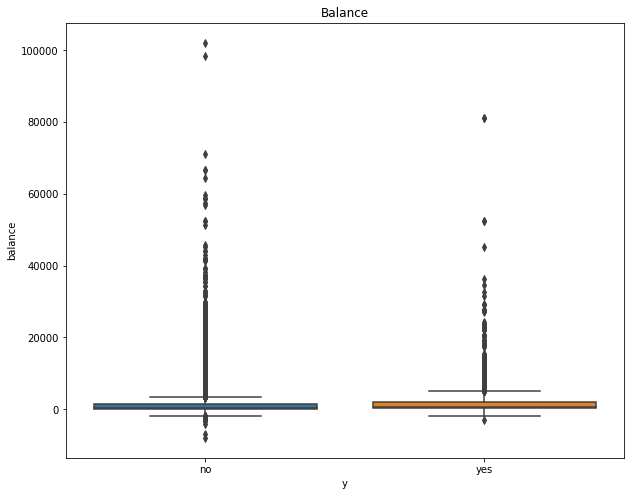

In [33]:
#balance
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['balance'],x=Dataset['y'])
plt.title('Balance')
plt.xlabel('y')
plt.show()

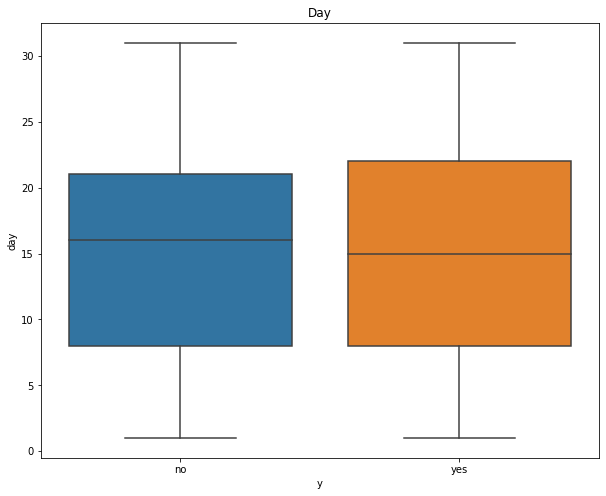

In [34]:
#day
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['day'],x=Dataset['y'])
plt.title('Day')
plt.xlabel('y')
plt.show()

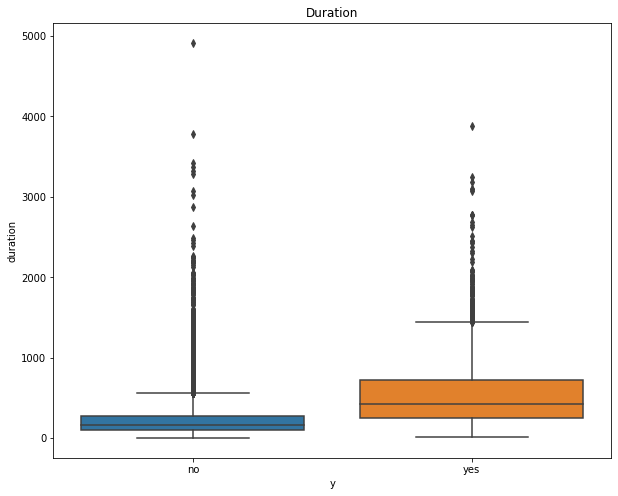

In [35]:
#duration
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['duration'],x=Dataset['y'])
plt.title('Duration')
plt.xlabel('y')
plt.show()

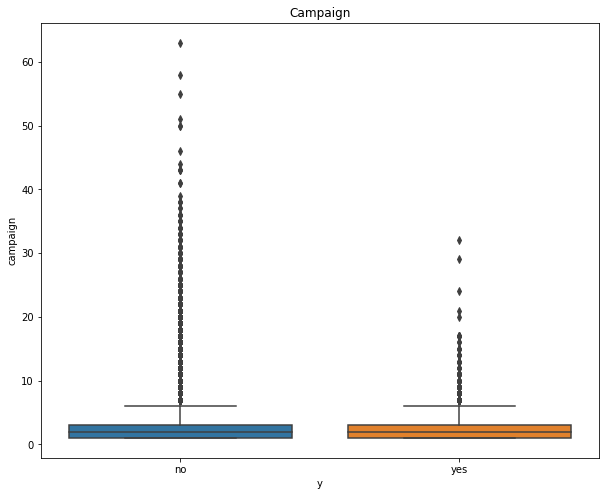

In [36]:
#campaign
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['campaign'],x=Dataset['y'])
plt.title('Campaign')
plt.xlabel('y')
plt.show()

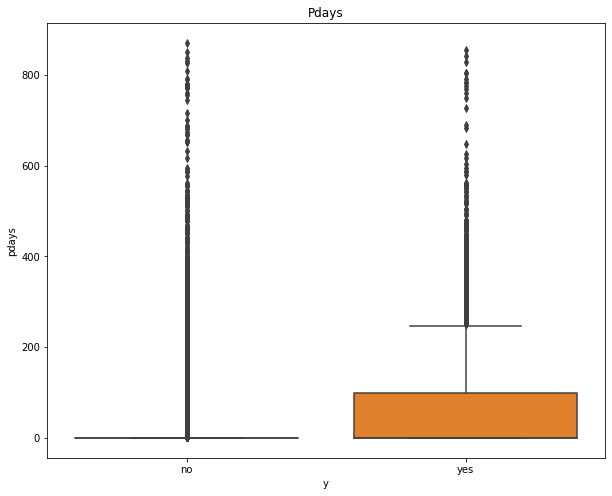

In [37]:
#pdays
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['pdays'],x=Dataset['y'])
plt.title('Pdays')
plt.xlabel('y')
plt.show()

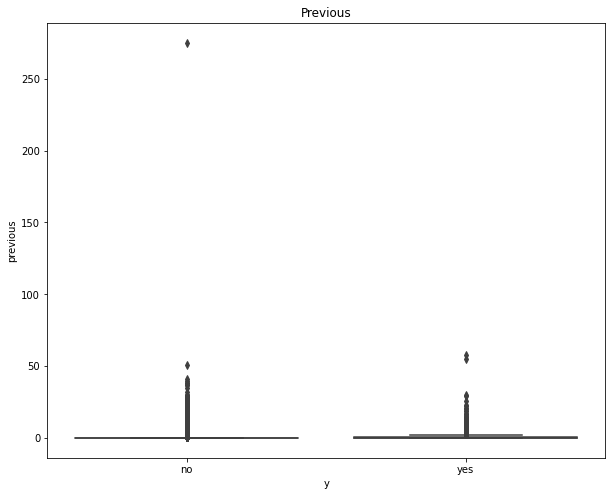

In [38]:
#previous
plt.figure(figsize=(10,8))
sns.boxplot(y=Dataset['previous'],x=Dataset['y'])
plt.title('Previous')
plt.xlabel('y')
plt.show()

As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers.

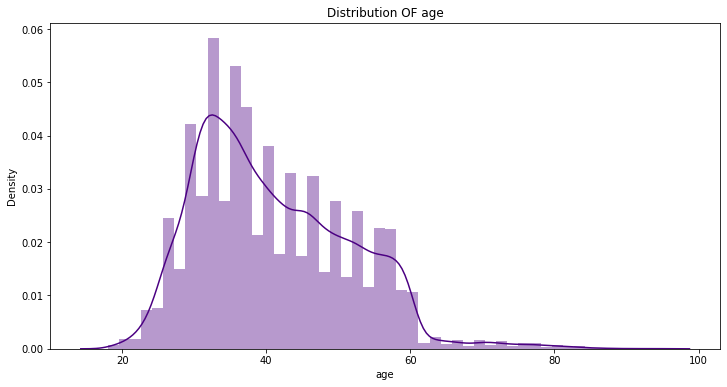

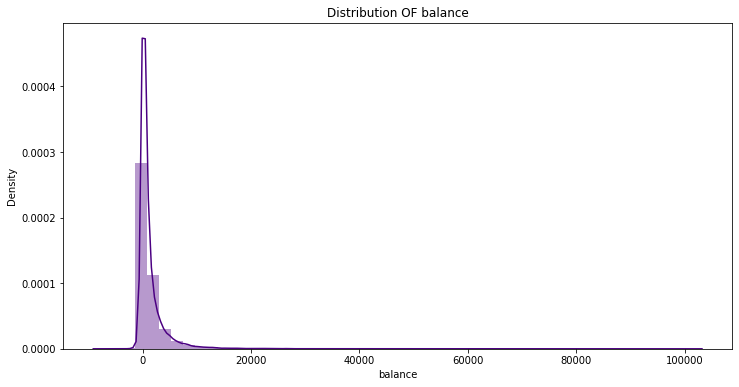

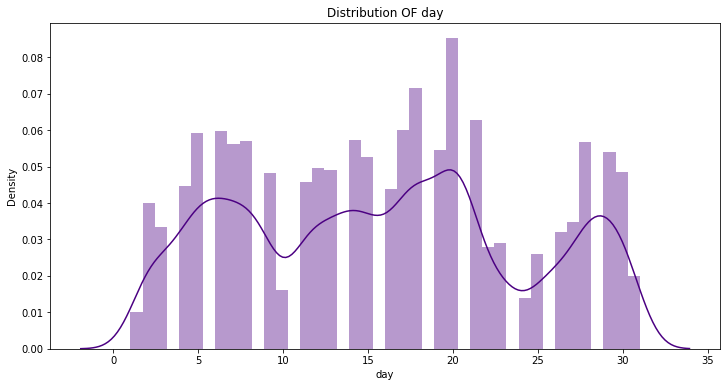

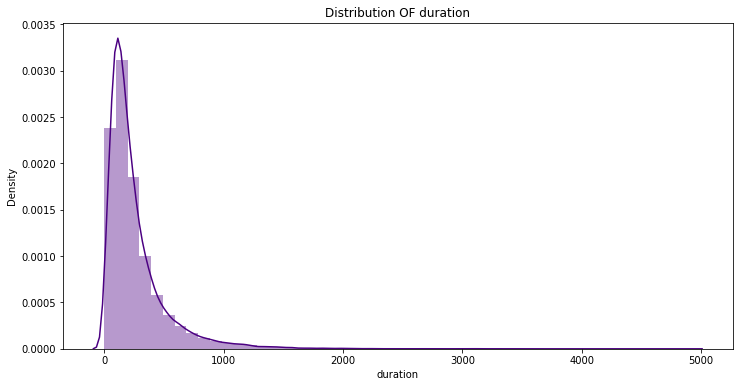

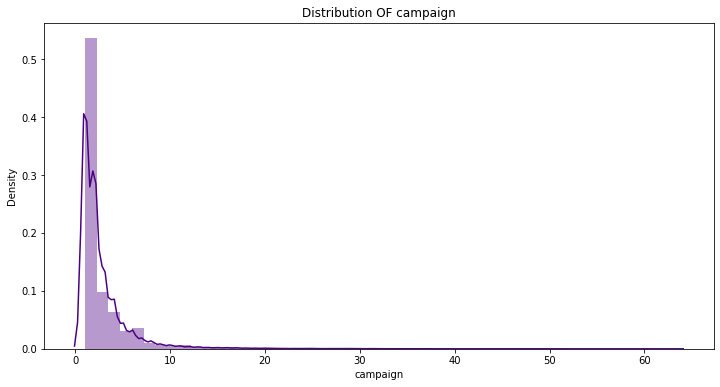

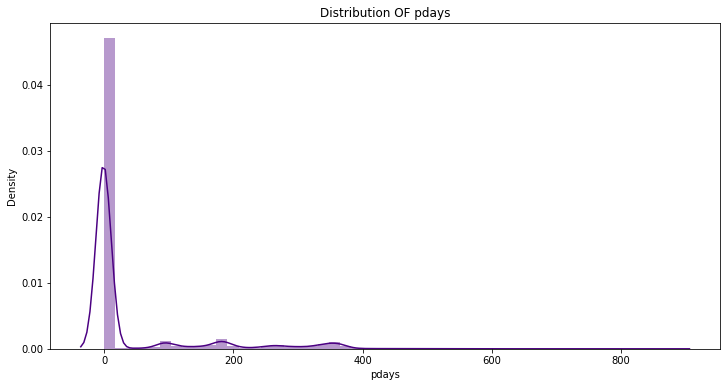

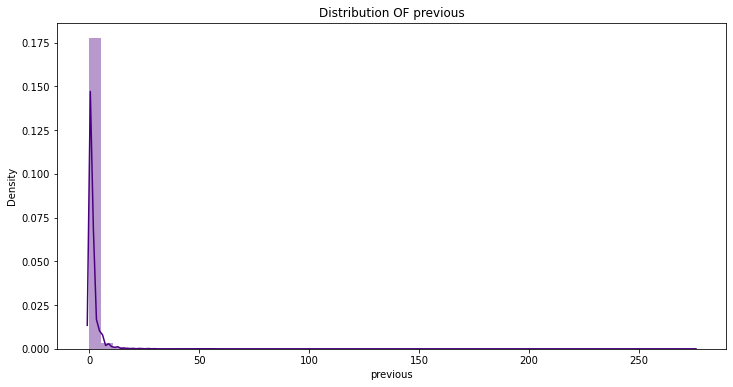

In [39]:
# plot a univariate distribution of continues observations
# Distibution plot of Numerical features

for col in numerical_columns:
  plt.figure(figsize=(12,6))
  sns.distplot(Dataset[col],color='indigo')
  plt.title('Distribution OF {}'.format(col))
  plt.show()

##**Take-away:**


It seems age, days distributed normally.

'balance', 'duration', 'campaign', 'pdays' and previous heavily skewed towards left and seems to be have some outliers.

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

## Correlation Matrix of the numerical features

In [40]:
#correlation
Dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


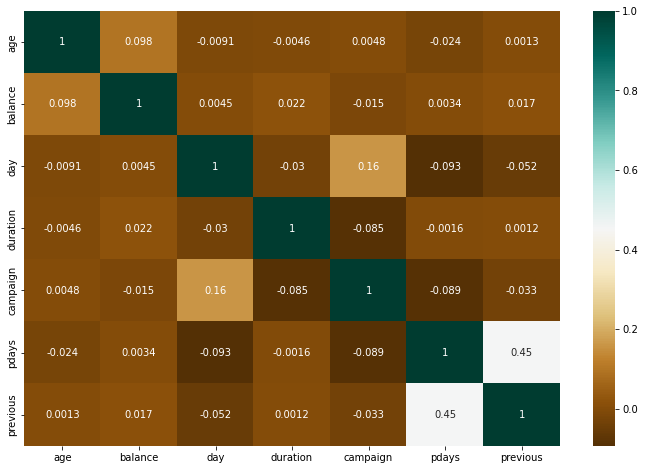

In [41]:
#Heatmap
plt.subplots(figsize=(12,8))
sns.heatmap(Dataset.corr(),annot=True,cmap='BrBG')

From the above heatmap we can see that there are some numerical features which share a high correlation between them.

## **Data Preprocessing**

In [42]:
#Checking For Shape
Dataset.shape

(45211, 17)

In [43]:
#Checking For Head
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.

There are categorical columns also, but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.

All feature columns we need to convert into numeric values then only we can feed into the model.

Convert default column into numeric value We can convert the yes values to 1, and the no values to 0 for default column We will lamda function for its

pandas.DataFrame.apply

DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), **kwargs): Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

-- Creating one-hot encoding for non-numeric marital column

In [44]:
marital_dummies=pd.get_dummies(Dataset['marital'],prefix='marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [45]:
#Merge marital_dummies with marital column
pd.concat([Dataset['marital'],marital_dummies],axis=1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.


There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.


So let us remove one column divorced.

In [46]:
# Remove marital_divorced Column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [47]:
#Merge marital_dummies into  main dataframe
Dataset=pd.concat([Dataset,marital_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


---Creating One Hot Encoding For Job Column

In [48]:
job_dummies=pd.get_dummies(Dataset['job'],prefix='job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
job_dummies.drop('job_admin.',axis=1,inplace=True)

In [50]:
#Merge job_dummies into main dataframe
Dataset=pd.concat([Dataset,job_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


---Creating One Hot Encoding Of Education Column

In [51]:
education_dummies=pd.get_dummies(Dataset['education'],prefix='education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [52]:
education_dummies.drop('education_primary',axis=1,inplace=True)

In [53]:
Dataset=pd.concat([Dataset,education_dummies],axis=1)
Dataset.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


---Creating One Hot Encoding For Contact Column

In [54]:
contact_dummies=pd.get_dummies(Dataset['contact'],prefix='contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [55]:
contact_dummies.drop('contact_cellular',axis=1,inplace=True)

In [56]:
Dataset=pd.concat([Dataset,contact_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


---Creating One Hot Encoding Of poutcome Column

In [57]:
poutcome_dummies=pd.get_dummies(Dataset['poutcome'],prefix='poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [58]:
poutcome_dummies.drop('poutcome_failure',axis=1,inplace=True)

In [59]:
Dataset=pd.concat([Dataset,poutcome_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,1


---Converting Month Column Into Numeric values

In [60]:
months={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
Dataset['month']=Dataset['month'].map(months)
Dataset['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [61]:
Dataset[Dataset['pdays']==-1]['pdays'].count()

36954

In [62]:
Dataset['was_contacted']=Dataset['pdays'].apply(lambda row:0 if row==-1 else 1)
Dataset[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


---Convert Default Column Into Numeric Value

In [63]:
Dataset['is_default']=Dataset['default'].apply(lambda row: 1 if row=='yes' else 0)

In [64]:
#view default and is_default columns together
Dataset[['default','is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


---Converting Housing Column Into Numeric Value

In [65]:
Dataset['is_housing']=Dataset['housing'].apply(lambda row: 1if row=='yes' else 0)

In [66]:
#View housing and is_housing columns together
Dataset[['housing','is_housing']].head()

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


---Converting loan column into numeric value

In [67]:
Dataset['is_loan']=Dataset['loan'].apply(lambda row: 1 if row =='yes' else 0)

In [68]:
#View loan and is_loan columns together
Dataset[['loan','is_loan']].head()

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


---Convert Target Column 'y' Into Numeric Value

In [69]:
Dataset['target']=Dataset['y'].apply(lambda row : 1 if row =='yes' else 0)

In [70]:
#View y and target columns together
Dataset[['y','target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [71]:
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


---Delete job, education, default, housing, loan, contact, month, pdays, poutcome, y columns.

In [72]:
Dataset.drop(['job','education','marital','default','housing','loan','contact','poutcome','y','month','duration','age','day'],axis=1,inplace=True)

View After Converting All Columns Into Numeric Column

In [73]:
Dataset.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
dtype: object

In [74]:
Dataset.shape

(45211, 30)

In [75]:
# remove the outlier using IsolationForest Technique
from sklearn.ensemble import IsolationForest

In [76]:
features = Dataset.drop(['target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
Dataset['is_anomaly'] = anomalies
Dataset = Dataset[Dataset['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [77]:
Dataset.shape

(40690, 30)

In [78]:
# Assigning values to independent variables
X = Dataset.drop('target', axis = 1)
X.head()

,balance,campaign,pdays,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan
0,2143,1,-1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
3,1506,1,-1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,1,-1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [79]:
# Assigning the values of dependent variables
y = Dataset['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [80]:
# Over sampling the data using SMOTE
from imblearn.over_sampling import SMOTE

In [81]:
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

#**SMOTE :-**


One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE.


In [82]:
X.shape

(73082, 29)

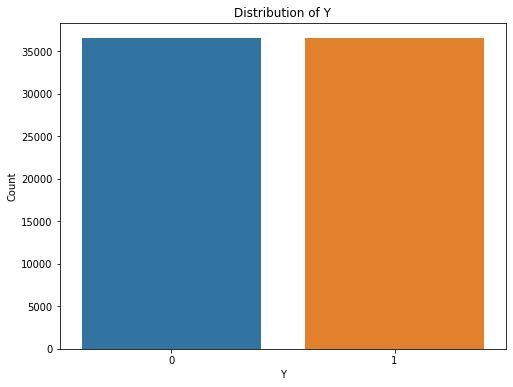

In [83]:
# countplot of dependent column y

plt.figure(figsize = (8,6))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

#**Train-Test Split**

In [84]:
# Scale the data using Standard Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [85]:
# Splitting the data into train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state =42)

In [86]:
print(X_train.shape)

(54811, 29)


In [87]:
print(y_train.shape)

(54811,)


In [88]:
print(X_test.shape)

(18271, 29)


In [89]:
print(y_test.shape)

(18271,)


#**Models Implementation**


**Logistic Regression**

**Decision Tree**

**XGBoost Classifier**

**K - Nearest Neighbors**

#**Logistic Regression**


Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category.

In [90]:
# fitting model to logistic regression
logistic_model = LogisticRegression(fit_intercept = True, max_iter = 10000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [91]:
# get the model coefficients
logistic_model.coef_

array([[-0.00774874, -0.44244072, -0.11943217, -0.00193634, -0.75795337,
        -0.59756251, -0.92375687, -0.46504869, -0.53996253, -0.83183259,
        -0.46488617, -0.42887929, -0.60493895, -0.19339123, -0.75901436,
        -0.41673696, -0.19082943, -0.78312023, -0.52533226, -0.33887335,
        -0.24411732, -0.79392559, -0.10376652,  0.26806059, -1.82747759,
        -1.69291038, -0.12460487, -0.56834327, -0.46838312]])

In [92]:
#Get the model intercept
logistic_model.intercept_

array([0.1078359])

In [93]:
#Get the predicted probabilities
train_preds = logistic_model.predict_proba(X_train)
test_preds = logistic_model.predict_proba(X_test)

In [94]:
# Get the predicted classes
train_class_preds = logistic_model.predict(X_train)
test_class_preds = logistic_model.predict(X_test)

In [95]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4)) 
print(round((test_accuracy), 4))

0.8663
0.8613


In [96]:
log_train_preds = logistic_model.predict_proba(X_train)[:,1]
log_test_preds = logistic_model.predict_proba(X_test)[:,1]

In [97]:
from sklearn.metrics import roc_auc_score

print(round(roc_auc_score(y_train,log_train_preds), 4))
print(round(roc_auc_score(y_test,log_test_preds), 4))

0.9348
0.9316


In [98]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     28941
          no       0.84      0.89      0.86     25870

    accuracy                           0.87     54811
   macro avg       0.87      0.87      0.87     54811
weighted avg       0.87      0.87      0.87     54811



              precision    recall  f1-score   support

         yes       0.89      0.84      0.86      9617
          no       0.83      0.88      0.86      8654

    accuracy                           0.86     18271
   macro avg       0.86      0.86      0.86     18271
weighted avg       0.86      0.86      0.86     18271



In [99]:
# Hyperprarameter tuning using GridSearchCV
logistic_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(logistic_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [100]:
log_optimal_model = log_grid.best_estimator_

In [101]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [102]:
# Calculating accuracy on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((log_train_accuracy),4))
print(round((log_test_accuracy), 4))


0.8663
0.8613


In [103]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [104]:
print(round((roc_auc_score(y_train,log_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,log_optimal_test_preds)), 4))

0.9348
0.9316


In [105]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     28941
          no       0.84      0.89      0.86     25870

    accuracy                           0.87     54811
   macro avg       0.87      0.87      0.87     54811
weighted avg       0.87      0.87      0.87     54811



              precision    recall  f1-score   support

         yes       0.89      0.84      0.86      9617
          no       0.83      0.88      0.86      8654

    accuracy                           0.86     18271
   macro avg       0.86      0.86      0.86     18271
weighted avg       0.86      0.86      0.86     18271



#**Decision Tree**

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

In [106]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [107]:
# Get the predicted classes
train_class_preds = tree_model.predict(X_train)
test_class_preds = tree_model.predict(X_test)

In [108]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4))
print(round((test_accuracy), 4))

0.9911
0.8793


In [109]:
tree_train_preds = tree_model.predict_proba(X_train)[:,1]
tree_test_preds = tree_model.predict_proba(X_test)[:,1]

In [110]:
print(round((roc_auc_score(y_train,tree_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_test_preds)), 4))

0.9998
0.8843


In [111]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27343
          no       0.99      0.99      0.99     27468

    accuracy                           0.99     54811
   macro avg       0.99      0.99      0.99     54811
weighted avg       0.99      0.99      0.99     54811



              precision    recall  f1-score   support

         yes       0.86      0.90      0.88      8726
          no       0.90      0.86      0.88      9545

    accuracy                           0.88     18271
   macro avg       0.88      0.88      0.88     18271
weighted avg       0.88      0.88      0.88     18271



In [112]:
#Hyperprarameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
tree_grid = GridSearchCV(tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.1s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [113]:
tree_optimal_model = tree_grid.best_estimator_

In [114]:
# Making predictions on train and test data

train_class_preds = tree_optimal_model.predict(X_train)
test_class_preds = tree_optimal_model.predict(X_test)

In [115]:
# Calculating accuracy on train and test
tree_train_accuracy = accuracy_score(y_train,train_class_preds)
tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((tree_train_accuracy),4))
print(round((tree_test_accuracy), 4))

0.8418
0.8351


In [116]:
tree_optimal_train_preds = tree_optimal_model.predict_proba(X_train)[:,1]
tree_optimal_test_preds = tree_optimal_model.predict_proba(X_test)[:,1]

In [117]:
print(round((roc_auc_score(y_train,tree_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_optimal_test_preds)), 4))

0.916
0.9054


In [118]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.87      0.83      0.85     28710
          no       0.82      0.86      0.84     26101

    accuracy                           0.84     54811
   macro avg       0.84      0.84      0.84     54811
weighted avg       0.84      0.84      0.84     54811



              precision    recall  f1-score   support

         yes       0.86      0.82      0.84      9664
          no       0.81      0.86      0.83      8607

    accuracy                           0.84     18271
   macro avg       0.84      0.84      0.84     18271
weighted avg       0.84      0.84      0.84     18271



In [119]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [120]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'marital_married',
       'marital_single', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'was_contacted', 'is_default', 'is_housing', 'is_loan'],
      dtype='object')

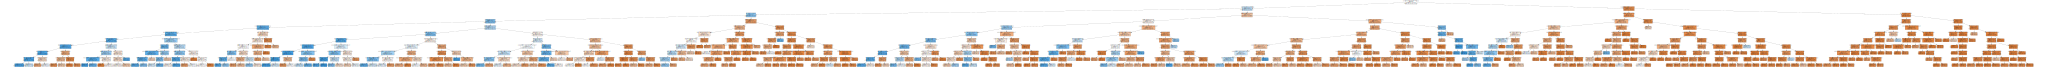

<Figure size 144x144 with 0 Axes>

In [121]:
plt.figure(figsize=(2,2))
graph = Source(tree.export_graphviz(tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [122]:
importances = tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
21,contact_unknown,0.28
27,is_housing,0.16
5,marital_single,0.09
28,is_loan,0.07
4,marital_married,0.07
1,campaign,0.07
9,job_management,0.03
17,education_secondary,0.03
0,balance,0.03
14,job_technician,0.03


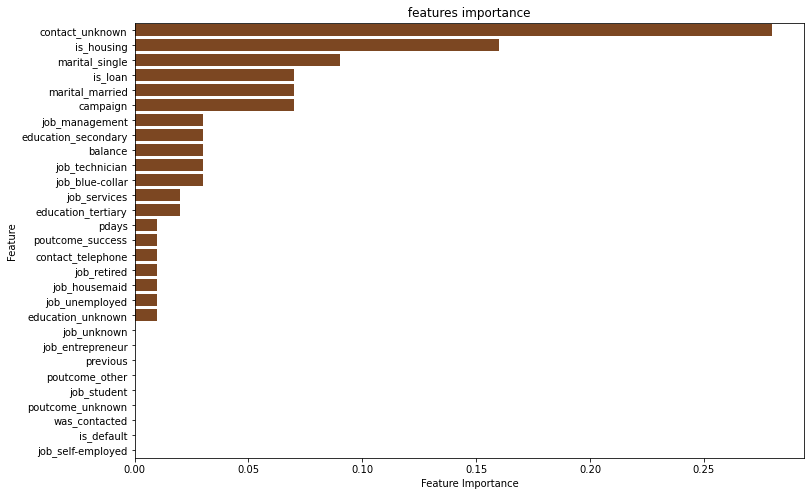

In [123]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance', y="Feature", color = 'saddlebrown', data=fim_gb_df)
plt.show()

#**XGBoost Classifier**

XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction. Just like in Random Forests, XGBoost uses Decision Trees as base learners: Image by the author. Decision tree to prediction.

In [124]:
import xgboost as xgb

In [125]:
XGBoost_model = xgb.XGBClassifier()
XGBoost_model.fit(X_train, y_train)

XGBClassifier()

In [126]:
# Get the predicted classes

train_class_preds = XGBoost_model.predict(X_train)
test_class_preds = XGBoost_model.predict(X_test)

In [127]:
# Get the Accuracy classes

train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [128]:
print(round((train_accuracy), 4))

0.8679


In [129]:
print(round((test_accuracy), 4))


0.8621


In [130]:
XGBoost_train_preds =  XGBoost_model.predict_proba(X_train)[:, 1]
XGBoost_test_preds =  XGBoost_model.predict_proba(X_test)[:, 1]

In [131]:
print(round((roc_auc_score(y_train,XGBoost_train_preds )), 4))

0.937


In [132]:
print(round((roc_auc_score(y_test,XGBoost_test_preds )), 4))

0.9323


In [133]:
target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.88      0.86      0.87     27962
          no       0.86      0.88      0.87     26849

    accuracy                           0.87     54811
   macro avg       0.87      0.87      0.87     54811
weighted avg       0.87      0.87      0.87     54811



              precision    recall  f1-score   support

         yes       0.88      0.85      0.86      9374
          no       0.85      0.87      0.86      8897

    accuracy                           0.86     18271
   macro avg       0.86      0.86      0.86     18271
weighted avg       0.86      0.86      0.86     18271



In [134]:
# Hyperparameter tuning using GridSearch
XGBoost_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
XGBoost_grid = GridSearchCV(XGBoost_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
XGBoost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.2s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='roc_auc', verbose=2)

In [135]:
XGBoost_optimal_model =XGBoost_grid.best_estimator_

In [136]:
# Making predictions on train and test data

train_class_preds = XGBoost_optimal_model.predict(X_train)
test_class_preds = XGBoost_optimal_model.predict(X_test)

In [137]:
# Calculating accuracy on train and test

XGBoost_train_accuracy = accuracy_score(y_train,train_class_preds)
XGBoost_test_accuracy = accuracy_score(y_test,test_class_preds)

In [138]:
print(round((XGBoost_train_accuracy), 4))
print(round((XGBoost_test_accuracy), 4))

0.9563
0.9056


In [139]:
XGBoost_optimal_train_preds = XGBoost_optimal_model.predict_proba(X_train)[:, 1]
XGBoost_optimal_test_preds = XGBoost_optimal_model.predict_proba(X_test)[:, 1]

In [140]:
target_names = ['yes', 'no']
print(classification_report( train_class_preds, y_train, target_names = target_names))
print('\n')
print(classification_report( test_class_preds, y_test, target_names = target_names))

              precision    recall  f1-score   support

         yes       0.97      0.95      0.96     27950
          no       0.95      0.97      0.96     26861

    accuracy                           0.96     54811
   macro avg       0.96      0.96      0.96     54811
weighted avg       0.96      0.96      0.96     54811



              precision    recall  f1-score   support

         yes       0.92      0.90      0.91      9342
          no       0.89      0.92      0.90      8929

    accuracy                           0.91     18271
   macro avg       0.91      0.91      0.91     18271
weighted avg       0.91      0.91      0.91     18271



In [142]:
importances = XGBoost_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
21,contact_unknown,0.16
8,job_housemaid,0.08
11,job_self-employed,0.08
15,job_unemployed,0.07
7,job_entrepreneur,0.06
19,education_unknown,0.05
10,job_retired,0.05
28,is_loan,0.04
12,job_services,0.04
27,is_housing,0.03


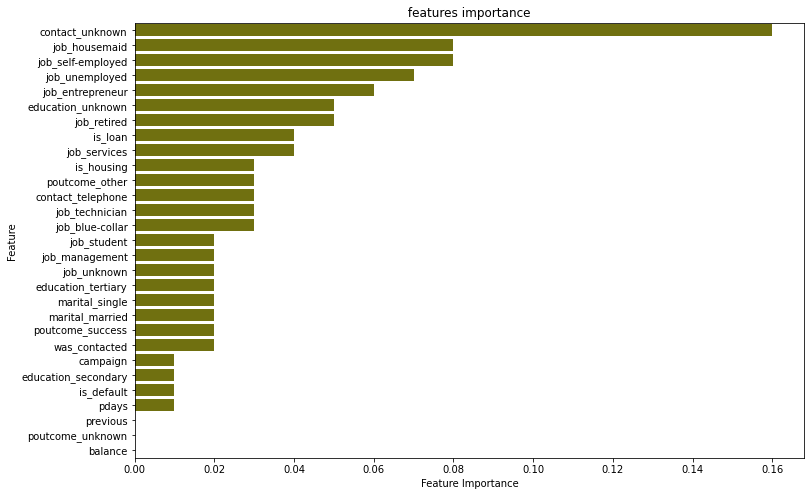

In [143]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature", color = 'olive', data=fim_gb_df)

#K-Nearest Neighbors (KNN)

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

The first determining property of machine learning algorithms is the split between supervised and unsupervised models. The difference between supervised and unsupervised models is the problem statement.

In supervised models, you have two types of variables at the same time:

A target variable, which is also called the dependent variable or the y variable. Independent variables, which are also known as x variables or explanatory variables.



In [144]:
# Setup a knn classifier with k neighbors
KNN_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [145]:
train_class_preds = KNN_model.predict(X_train)
test_class_preds = KNN_model.predict(X_test)


In [146]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [147]:
print(round((train_accuracy),4))
print(round((test_accuracy),4))

0.9294
0.8877


In [148]:
KNN_train_preds = KNN_model.predict_proba(X_train)[:,1]
KNN_test_preds = KNN_model.predict_proba(X_test)[:,1]

In [149]:
print(round((roc_auc_score(y_train,KNN_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_test_preds)), 4))

0.985
0.924


In [150]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.93      0.92      0.93     27704
          no       0.92      0.93      0.93     27107

    accuracy                           0.93     54811
   macro avg       0.93      0.93      0.93     54811
weighted avg       0.93      0.93      0.93     54811



              precision    recall  f1-score   support

         yes       0.89      0.89      0.89      9122
          no       0.89      0.89      0.89      9149

    accuracy                           0.89     18271
   macro avg       0.89      0.89      0.89     18271
weighted avg       0.89      0.89      0.89     18271



In [151]:
#Hyperprarameter tuning using GridSearchCV

KNN_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
KNN_grid = GridSearchCV(KNN_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
KNN_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................................n_neighbors=1; total time=   3.7s
[CV] END ......................................n_neighbors=1; total time=   3.6s
[CV] END ......................................n_neighbors=1; total time=   3.8s
[CV] END ......................................n_neighbors=1; total time=   3.7s
[CV] END ......................................n_neighbors=1; total time=   3.7s
[CV] END ......................................n_neighbors=3; total time=   5.4s
[CV] END ......................................n_neighbors=3; total time=   5.4s
[CV] END ......................................n_neighbors=3; total time=   5.4s
[CV] END ......................................n_neighbors=3; total time=   5.4s
[CV] END ......................................n_neighbors=3; total time=   5.3s
[CV] END ......................................n_neighbors=5; total time=   8.8s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='roc_auc', verbose=2)

In [152]:
KNN_grid.best_estimator_


KNeighborsClassifier(n_neighbors=23)

In [153]:
KNN_optimal_model = KNN_grid.best_estimator_

In [154]:
# Making predictions on train and test data

train_class_preds = KNN_optimal_model.predict(X_train)
test_class_preds = KNN_optimal_model.predict(X_test)

In [155]:
# Calculating accuracy on train and test
KNN_train_accuracy = accuracy_score(y_train,train_class_preds)
KNN_test_accuracy = accuracy_score(y_test,test_class_preds)

In [156]:
print(round((KNN_train_accuracy), 4))
print(round((KNN_test_accuracy), 4))

0.884
0.8738


In [157]:
KNN_optimal_train_preds = KNN_optimal_model.predict_proba(X_train)[:,1]
KNN_optimal_test_preds = KNN_optimal_model.predict_proba(X_test)[:,1]

In [158]:
print(round((roc_auc_score(y_train,KNN_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_optimal_test_preds)), 4))

0.953
0.9384


In [159]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.92      0.86      0.89     29162
          no       0.85      0.91      0.88     25649

    accuracy                           0.88     54811
   macro avg       0.88      0.89      0.88     54811
weighted avg       0.89      0.88      0.88     54811

              precision    recall  f1-score   support

         yes       0.91      0.85      0.88      9741
          no       0.84      0.90      0.87      8530

    accuracy                           0.87     18271
   macro avg       0.87      0.88      0.87     18271
weighted avg       0.88      0.87      0.87     18271



#**Conclusion**


*   For age , most of the customers are in the age range of 30-40.
*   For balance , above 1000$ is like to subscribe a term deposite.
*   The model can help to classify the customers on the basis on which they deposit or not.
*   The model helps to target the right customer rather than wasting time on wrong customer.
*   Comparing to all algorithms XGboost algorithm has best accuracy score and ROC-AUC score . So it is concluded as optimal model.


